## House - Price Prediction

##### Importing Libraries

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load

##### Reading the data

In [539]:
housing_data = pd.read_csv('BostonHousingData.csv')

In [540]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


here,

<u>CRIM</u> :    per capita crime rate by town
 
<u>ZN</u> :       proportion of residential land zoned for lots over 25,000 sq.ft.
 
<u>INDUS</u> :    proportion of non-retail business acres per town
 
<u>CHAS</u> :     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
<u>NOX</u> :      nitric oxides concentration (parts per 10 million)
 
<u>RM</u> :       average number of rooms per dwelling
 
<u>AGE</u> :      proportion of owner-occupied units built prior to 1940
 
<u>DIS</u> :      weighted distances to five Boston employment centres
 
<u>RAD</u> :      index of accessibility to radial highways
 
<u>TAX</u> :      full-value property-tax rate per $10,000
 
<u>PTRATIO</u> :  pupil-teacher ratio by town
 
<u>B</u> :        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
<u>LSTAT</u> :    % lower status of the population
 
<u>MEDV</u> :     Median value of owner-occupied homes in $1000's

In [541]:
housing_data['CHAS'].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

In [542]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


where,

_count_ : count or number of values (ignoring null values)

_mean_ : average of all the values 

_std_ : standard deviation, distance of the value from mean

_min_ : minimum value

_25%_ : 25% values less than the dispalyed value

_50%_ : 50% values less than the dispalyed value

_75%_ : 75% values less than the dispalyed value

_max_ : maximum value

In [543]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


##### Handling missing values

In [544]:
housing_data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


To take care of missing attributes, there're three options:

* Get rid of the missing data points  
* Get rid of the whole attribute
* Set the value to some value(0, mean, meadian)

In [545]:
housing_data.isnull().sum() 

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [546]:
housing_data.isnull().sum() / len(housing_data) * 100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

It can be seen that there're several missing attributes.

Since it isn't affordable to delete the data so replace the empty values with mean/median values.

In [547]:
# Fill missing values with mean for numerical columns

housing_data['CRIM'] = housing_data['CRIM'].fillna(housing_data['CRIM'].mean())

housing_data['ZN'] = housing_data['ZN'].fillna(housing_data['ZN'].mean())

housing_data['INDUS'] = housing_data['INDUS'].fillna(housing_data['INDUS'].mean())

housing_data['CHAS'] = housing_data['CHAS'].fillna(housing_data['CHAS'].mode()[0])           # Mode for categorical

housing_data['AGE'] = housing_data['AGE'].fillna(housing_data['AGE'].mean())

housing_data['LSTAT'] = housing_data['LSTAT'].fillna(housing_data['LSTAT'].median())         # Median for outliers

In [548]:
housing_data.isnull().sum() / len(housing_data) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [549]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.545770,22.921051,6.699165,0.250605,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Plotting Histograms

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

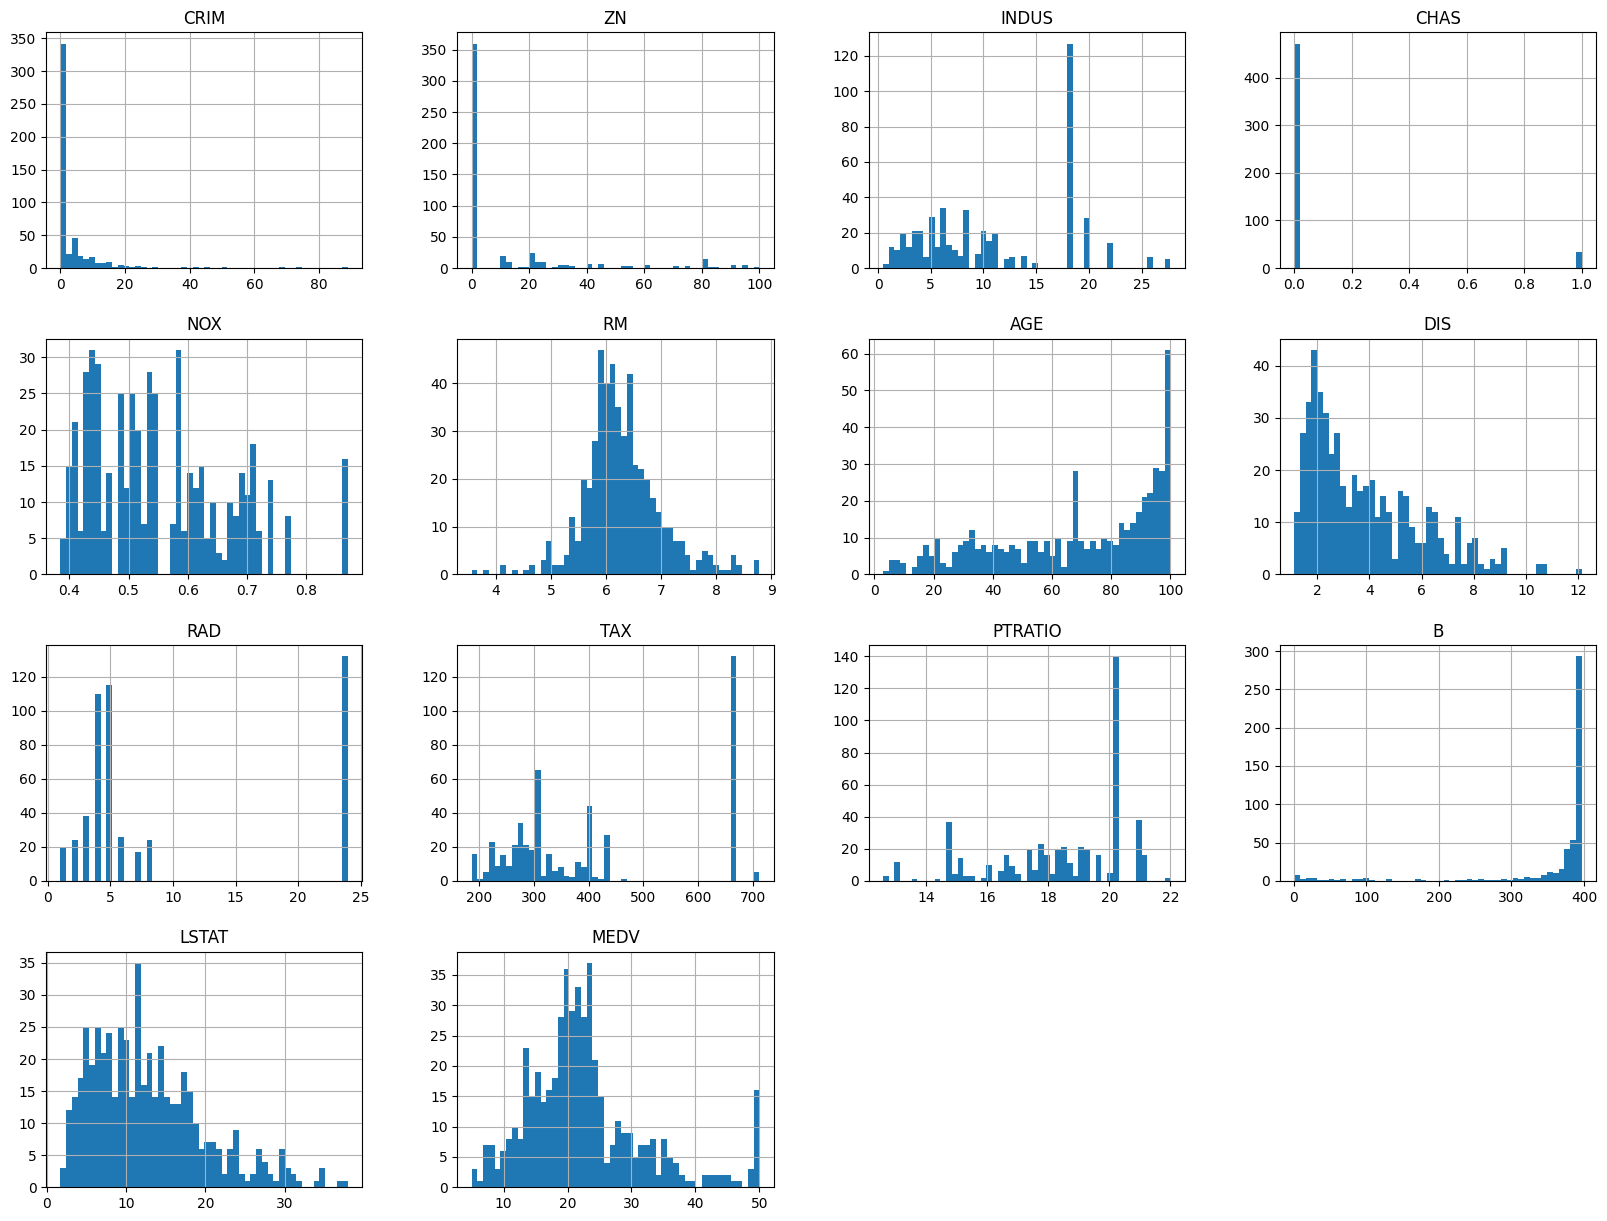

In [550]:
housing_data.hist(bins=50, figsize=(20, 15))

##### Splitting data into train and test set

In [551]:
def split_data(data, test_ratio):
    np.random.seed(42)                               # to fix shuffled values else they will keep changing everytime the code is run
    shuffled = np.random.permutation(len(data))                   
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [552]:
#train_set, test_set = split_data(housing_data, 0.2)

#print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

##### Using Scikit-learn to split the data

The scikit-learn comes with in-built function to perform the splitting.

In [553]:
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=50)

In [554]:
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 404
Rows in test set : 102


In order for the train and test set to represent the entire population, stratified sampling is done.

So if the variable or feature is very important perform StratifiedShuffleSplit.

In [555]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)

for train_index, test_index in split.split(housing_data, housing_data['CHAS']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [556]:
strat_test_set['CHAS'].value_counts()

CHAS
0.0    95
1.0     7
Name: count, dtype: int64

In [557]:
strat_train_set['CHAS'].value_counts()


CHAS
0.0    377
1.0     27
Name: count, dtype: int64

For a bigger dataset (as this one is realy small), copy strat_train_set into housing_data and then use it only to proceed further.

In [558]:
housing_data = strat_train_set.copy()

##### Finding Correlations in Data

In [559]:
corr_matrix = housing_data.corr()

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.700006
B          0.341448
ZN         0.335589
DIS        0.246524
CHAS       0.155566
AGE       -0.375446
CRIM      -0.383604
RAD       -0.406044
NOX       -0.427263
INDUS     -0.481811
TAX       -0.483053
PTRATIO   -0.527026
LSTAT     -0.726100
Name: MEDV, dtype: float64

A Correlation coefficient is there with MEDV.

_Pearson's Correlation Coefficient_: When one variable changes, the other variable changes in the same or opposite direction.

Here, With change in  MEDV, MEDV is obviously equal: RM, ZN, B, DIS, CHAS changes in the same direction while the rest change in the opposite direction.

    Positive Values --> Strong Positive Correlation 

    Negative Values --> Strong Negative Correlation

##### Plotting Correlations

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

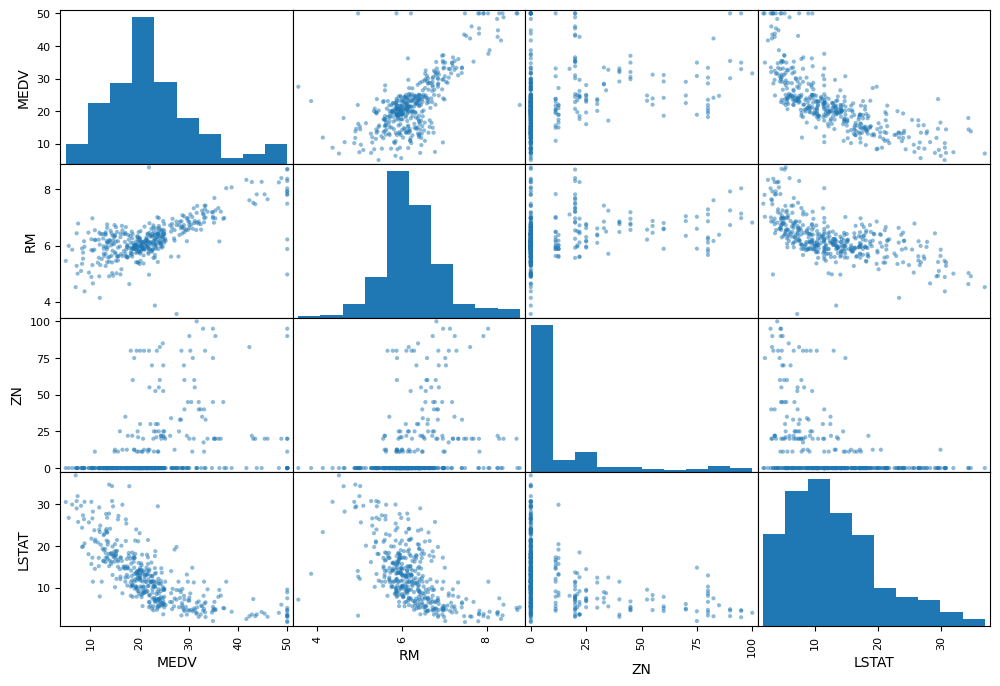

In [560]:
# plotting only strong oorrelations

attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']

scatter_matrix(housing_data[attributes], figsize=(12, 8))

<Axes: xlabel='RM', ylabel='MEDV'>

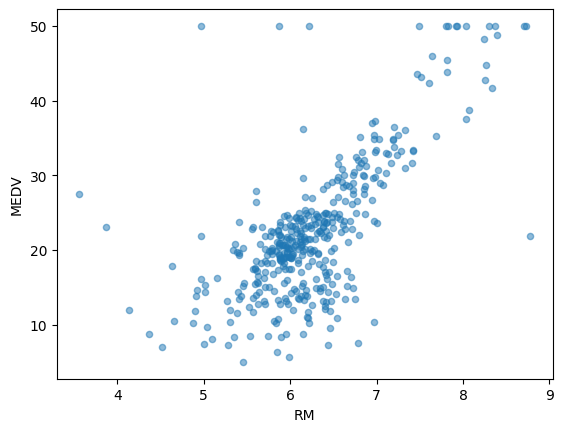

In [561]:
housing_data.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

Now with the help of this graph outliers can be removed which will result in clean dataset and reduce machine's confusion.

This is how Correlation Matrix helps in ML.

##### Trying out Different Atrribute Combinations

In [562]:
housing_data["TAXRM"] = housing_data["TAX"]/housing_data["RM"]

housing_data["TAXRM"]

22      49.983719
463    102.257024
197     46.292388
230     51.329209
394    113.130627
          ...    
9       51.798801
329     67.898310
15      52.622557
168     63.775914
398    122.134605
Name: TAXRM, Length: 404, dtype: float64

In [563]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
22,1.232470,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2,49.983719
463,5.821150,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29,20.2,102.257024
197,0.046660,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3,46.292388
230,0.537000,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8,307,17.4,378.35,11.65,24.3,51.329209
394,3.611874,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7,113.130627


In [564]:
# correlation 

corr_matrix = housing_data.corr()

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.700006
B          0.341448
ZN         0.335589
DIS        0.246524
CHAS       0.155566
AGE       -0.375446
CRIM      -0.383604
RAD       -0.406044
NOX       -0.427263
INDUS     -0.481811
TAX       -0.483053
PTRATIO   -0.527026
TAXRM     -0.544971
LSTAT     -0.726100
Name: MEDV, dtype: float64

This new attribute is found to be having strong negative correlation.

<Axes: xlabel='TAXRM', ylabel='MEDV'>

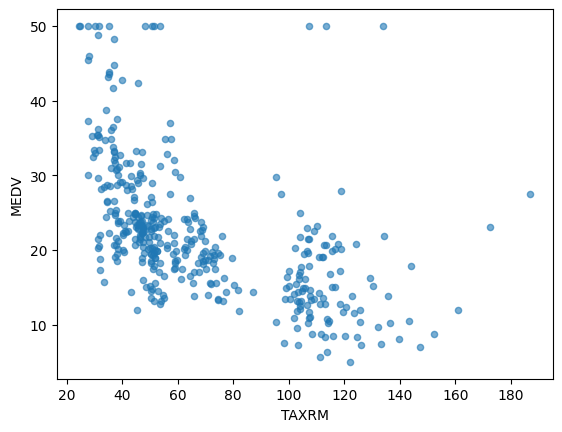

In [565]:
housing_data.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.6)

##### Separating Features & Labels

In [566]:
housing_features = strat_train_set.drop("MEDV", axis=1)

housing_labels = strat_train_set["MEDV"].copy()

##### Handling missing attributes with Sklearn 

Sklearn have in built function to preprocess data

In [567]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')             # fitting median

imputer.fit(housing_data)

SimpleImputer(strategy='median')

In [568]:
imputer.statistics_

array([3.20455000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.16350000e+00, 7.39000000e+01, 3.10090000e+00,
       5.00000000e+00, 3.30000000e+02, 1.89500000e+01, 3.90925000e+02,
       1.14300000e+01, 2.10000000e+01, 5.36068119e+01])

In [569]:
X = imputer.transform(housing_data)

In [570]:
housing_trdata = pd.DataFrame(X, columns=housing_data.columns)

housing_trdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.750339,10.851404,10.993584,0.066832,0.557271,6.253569,68.555079,3.771411,9.613861,408.428218,18.398762,352.558861,12.842079,22.400495,67.275951
std,8.739218,22.336709,6.696630,0.250040,0.116863,0.722974,27.544791,2.129227,8.759789,168.744884,2.202497,96.141560,7.140311,9.172521,31.979843
min,0.010960,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082973,0.000000,5.190000,0.000000,0.449000,5.875750,46.175000,2.070275,4.000000,279.000000,16.900000,372.685000,7.250000,16.375000,44.483341
50%,0.320455,0.000000,9.690000,0.000000,0.538000,6.163500,73.900000,3.100900,5.000000,330.000000,18.950000,390.925000,11.430000,21.000000,53.606812
75%,3.611874,11.533951,18.100000,0.000000,0.635000,6.582500,93.325000,5.117025,24.000000,666.000000,20.200000,396.157500,17.102500,25.050000,100.052582
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


##### Creating Pipeline

It's better to automate things before creating ML models.

By creating pipelines, changes in the code and model is done easily.

In [571]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])

In [572]:
housing_num = pipeline.fit_transform(housing_features)      

housing_num

array([[-0.28846874, -0.48641269, -0.42665073, ...,  1.18250491,
         0.46177864,  0.82422311],
       [ 0.23724985, -0.48641269,  1.06250866, ...,  0.81883035,
         0.42970282, -0.35786169],
       [-0.42432532,  3.09957641, -1.41643337, ..., -2.63607788,
         0.01823675, -0.59343731],
       ...,
       [-0.3577919 , -0.48641269, -0.42665073, ...,  1.18250491,
         0.44844843, -0.61306861],
       [-0.16611751, -0.48641269,  1.28378937, ..., -1.68143218,
        -0.57766526, -0.24428059],
       [ 3.96424051, -0.48641269,  1.06250866, ...,  0.81883035,
         0.46177864,  2.48867705]])

[ Pipelining should be done before imputing ]

In [573]:
housing_num.shape

(404, 13)

##### Selecting a desired Model

Linear Regression

In [574]:
#model =  LinearRegression()                           # Discarding this model as the error is too high     Output : Scores :  [4.27501214 6.00256144 5.40261479 3.4585557  4.57232889 4.24468456 3.35318444 6.61377428 3.26540003 6.31664984] , Mean :  4.7504766117257144 , Standard Deviation :  1.194083062417834

model = DecisionTreeRegressor()                       # Overfitting at first better     Output :  Scores :  [4.40653617 5.1525272  4.83806049 3.53121965 5.86883719 3.86687859 3.83487288 5.85484842 3.9445849  5.59041591] , Mean :  4.68887813805330 , Standard Deviation :  0.8473875789299631

#model = RandomForestRegressor()                         # Output :  Scores :  [2.86291316 3.15009857 4.03186784 2.76670978 2.21894859 2.68781427 2.84081436 5.47698126 1.95068627 4.01914295] Mean :  3.2005977059325743 Standard Deviation :  0.9882354310063044

model.fit(housing_num, housing_labels)

DecisionTreeRegressor()

In [575]:
sample = housing_features.iloc[:5]

sample_labels = housing_labels.iloc[:5]

In [576]:
prepared_data = pipeline.transform(sample)

In [577]:
model.predict(prepared_data)

array([15.2, 20.2, 30.3, 24.3, 12.7])

In [578]:
list(sample_labels)

[15.2, 20.2, 30.3, 24.3, 12.7]

##### Evaluating the model

In [579]:
predictions = model.predict(housing_num)

mse = mean_squared_error(housing_labels, predictions)

rmse = np.sqrt(mse)

In [580]:
mse

0.0

In [581]:
rmse

0.0

Better Evaluation Technique - Cross Validation

In [582]:
scores = cross_val_score(model, housing_num, housing_labels, scoring='neg_mean_squared_error', cv=10)

rmse_scores = np.sqrt(-scores)

rmse_scores

array([4.361556  , 5.33076666, 4.92239779, 3.43830645, 5.77736964,
       5.69651209, 3.77696968, 6.91991691, 3.99462138, 5.2630552 ])

In [583]:
def print_scores(scores) :
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

In [584]:
print_scores(rmse_scores)

Scores :  [4.361556   5.33076666 4.92239779 3.43830645 5.77736964 5.69651209
 3.77696968 6.91991691 3.99462138 5.2630552 ]
Mean :  4.948147180030806
Standard Deviation :  1.0142159518309213


##### Save the Model  

In [591]:
dump = (model, "house_price_prediction_model")    #FIXME:

##### Testing the Model

In [586]:
X_test = strat_test_set.drop("MEDV", axis=1)

Y_test = strat_test_set["MEDV"].copy()


In [587]:
X_test_prepare = pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepare)

final_mse = mean_squared_error(Y_test, final_predictions)

final_rmse = np.sqrt(final_mse)


In [588]:
print(final_predictions, list(Y_test))

[22.2 50.  27.5 15.2 22.9 18.5 21.4 18.9 20.3 42.3 35.1 18.9 25.   5.
 22.6 27.5 18.9 20.6 24.4 25.  10.4 29.4 25.  50.  12.6 11.5 26.2 21.4
 28.1 21.  17.7 13.1 42.3 10.8 29.1 20.1 24.7 21.7 27.9 32.5 22.8 24.1
 37.6 20.  20.  37.  14.6 13.1  8.5 21.4 24.4 30.3 23.1 15.1 20.8 21.7
 22.6 23.8 27.5 15.1 10.5 31.7 24.6 23.1 16.2 20.5 33.1 13.1 17.2 33.2
 37.  21.7 18.1 17.1 29.6 24.3 23.1 17.5 18.2 29.8 33.1 30.3 20.2 24.4
 28.2 50.  20.1 28.7 10.4 33.  29.  24.6 13.1 13.3 19.5 20.1 30.8 18.5
 22.8 23.2 33.4 14.5] [20.7, 50.0, 27.5, 7.0, 20.6, 16.2, 22.9, 22.9, 19.4, 44.0, 37.9, 16.8, 24.6, 5.0, 22.0, 8.4, 16.6, 21.2, 21.1, 21.6, 50.0, 26.5, 24.2, 48.5, 18.4, 9.5, 22.0, 20.5, 24.5, 22.6, 17.4, 16.7, 39.8, 8.4, 23.3, 21.7, 20.3, 19.4, 13.9, 28.4, 23.8, 24.5, 46.7, 21.7, 21.2, 36.4, 17.8, 19.9, 11.3, 19.5, 23.1, 34.6, 19.5, 15.6, 23.0, 21.1, 22.7, 22.3, 14.1, 19.4, 7.2, 31.5, 22.1, 20.5, 18.0, 13.6, 26.6, 13.8, 13.3, 33.2, 41.3, 16.6, 18.4, 18.7, 37.3, 20.0, 23.0, 17.2, 23.0, 25.0, 32.2, 1

In [589]:
final_rmse

5.859063700880918

##### Using the Model

In [ ]:
model.load("house_price_prediction_model")

In [592]:
input = np.array([[-0.43942006, 3.12628155, -1.12165014, -0.27288841, -1.422627, -0.23979304, -1.31238772, 2.61111401, -1.0016859, -0.5778192, -0.979491834, 0.41164221, -0.86091034]])

model.predict(input)

array([21.9])